In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint  # will be used to show the decision tree graph
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import scipy.stats as stats
from sklearn import  metrics
from sklearn import tree
import graphviz

## Importation de la dataset : 

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';', index_col=0)
df['age'] = np.floor(df['age'] / 365.25)
print(df.shape)
df.head()

(70000, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,51.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,47.0,1,156,56.0,100,60,1,1,0,0,0,0


The dataset that w'ill be working on is composed of :   
### 11 freatures : 
- AGE:  integer (number of days)
- HEIGHT: integer (cm) 
- WEIGHT: integer (kg)
- GENDER: categorical (1: female, 2: male)
- AP_HIGH: systolic blood pressure, integer
- AP_LOW: diastolic blood pressure, integer 
- CHOLESTEROL: categorical (1: normal, 2: above normal, 3: well above normal)
- GLUCOSE: categorical (1: normal, 2: above normal, 3: well above normal)
- SMOKE: categorical (0: no, 1: yes)
- ALCOHOL: categorical (0: no, 1: yes)
- PHYSICAL_ACTIVITY: categorical (0: no, 1: yes)

### only one target :

- CARDIO_DISEASE:  categorical (0: no, 1: yes)


# Data visualisation

### Heart Disease Frequency for Sex

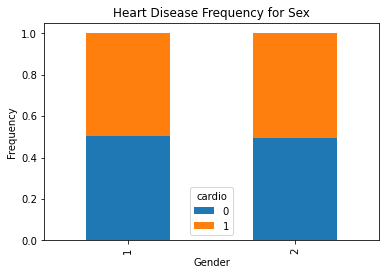

In [34]:
table= pd.crosstab(df['gender'],df['cardio'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()


Interpret : Heart disease is not influenced by gender

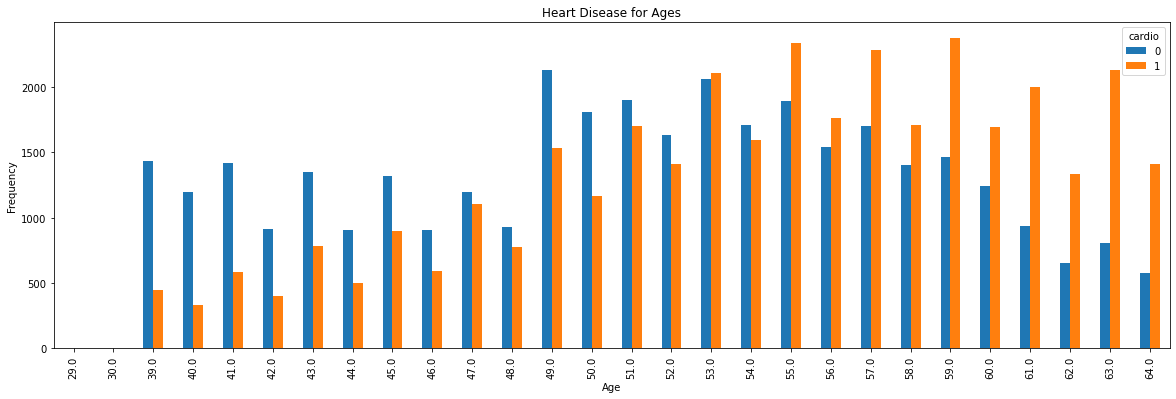

In [31]:
pd.crosstab(df.age,df.cardio).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Heart disease and Age are positively correlated : the probability of having heart disease increase evrytime the person get older

# ProfileReport : 

In [3]:
report = ProfileReport(df)

In [4]:
report

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# RandomForest : 
Let’s look how the Random Forest is constructed. It is a set of Decision Trees. Each Decision Tree is a set of internal nodes and leaves. In the internal node, the selected feature is used to make decision how to divide the data set into two separate sets with similars responses within. The features for internal nodes are selected with some criterion, which for classification tasks can be gini impurity or infomation gain, and for regression is variance reduction.

# Features importance : 

The feature importance (variable importance) describes which features are relevant. It can help with better understanding of the solved problem and sometimes lead to model improvements by employing the feature selection. 
there are 3 ways of computing feature importance for the Random Forest algorithm.

- Feature Importance built-in the Random Forest algorithm,
- Feature Importance computed with Permutation method,
- Feature Importance computed with SHAP values.

In our case, w'ill use the first method to search for features importance 

In [5]:
# definng and splitting data for train and test
X= df.drop('cardio', axis=1).to_numpy()
y= df['cardio'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3)

rf = RandomForestClassifier(n_estimators=100, random_state=2019)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=2019)

Feature ranking:
1 weight 0.23108265289595237
2 height 0.21003852712119678
3 ap_hi 0.18243555103632297
4 age 0.16403456306261605
5 ap_lo 0.09792664408940326
6 cholesterol 0.04233945500457725
7 gluc 0.01956004169666524
8 gender 0.0185085125869412
9 active 0.015017827307738199
10 smoke 0.010183470656210114
11 alco 0.008872754542376295


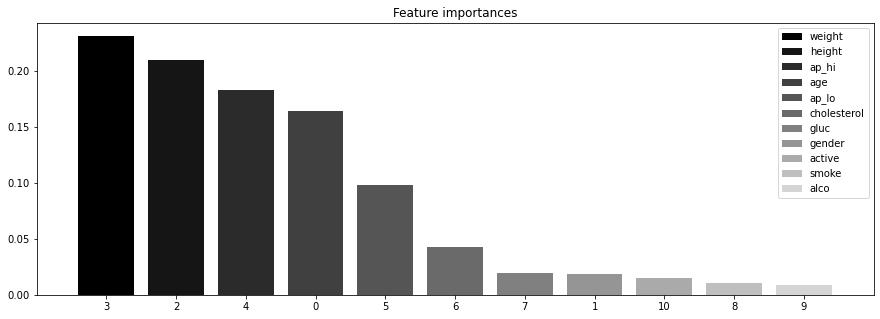

In [6]:
features = dict(zip(range(len(df.columns)-1), df.columns[:-1]))

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = max(10, len(df.columns[:-1]))
feature_indices = [ind for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot),  feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices]);

# RandomForest with default parameters : 

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Look at parameters used by our current forest

y_pred = rf.predict(X_test)
print('Accuracy_Score = ', round(accuracy_score(y_test, y_pred),2))
      
print('Parameters currently in use:\n')
pprint(rf.get_params())


Accuracy_Score =  0.71
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [8]:
# tree.plot_tree(estimator);

## Visualizing decision tree : 

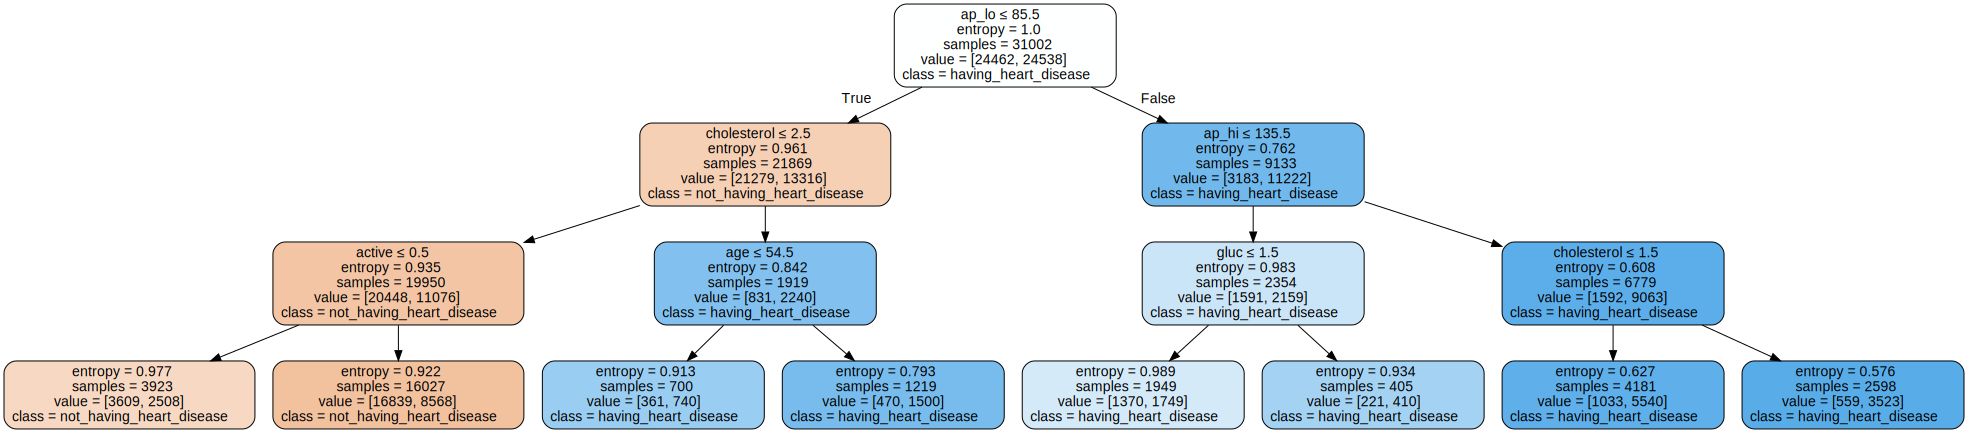

In [9]:
features = dict(zip(range(len(df.columns)-1), df.columns[:-1]))
clf = RandomForestClassifier(criterion= 'entropy', max_depth=3, n_estimators= 30)
clf.fit(X_train, y_train)
estimator = clf.estimators_[5]

dot_data_rf = tree.export_graphviz(estimator, out_file=None,filled=True, rounded=True,special_characters=True, feature_names = list(features.values()), class_names = ['not_having_heart_disease', 'having_heart_disease']) 
rf_graph = graphviz.Source(dot_data_rf)
rf_graph

### Comments : 
- Normally we have a 70000 samples in our dataset and 49000 samples for X_train, but in the dhpth 0 of our decision tree we can see that we have only 30956 !  $\color{blue}{\text{why ?}}$ 
- to measure impurity in binary decision tree we can use : Entropy, Gini index and Classification Error, in our case we used Entrepy as an example.
- in our case, we choose to fix a max_depth parameter to 3, just to show a graph with a small size and to be able to interpret it and to see the algorthme working.
- we can see that the entropy is continuously decreasing evrytime we increase depth_level
- We have only two classes : heart_N (no heart deasises) and Heart_D (heart deasises)

### Notes : 
The entropy is 0 if all samples of a node belong to the same class, and the entropy is maximal (equal 1) if we have a uniform class distribution (classes are perfectly mixed) . 

# Hyperparameter Optimization (HPO)

#### HPO algorithms will be used: 
- Grid search 
- random search
- hyperband 
- Bayesian Optimization with Gaussian Processes (BO-GP)
- Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE)
- particle swarm optimization (PSO)
- genetic algorithm (GA)

We cannot run all of those algorithms we listed before, but w'ill try to run only a three of them to compare between results  
those three algorithms are : GridSearch, RandomSearch and BO-GP

## 1: Grid Search
Search all the given hyper-parameter configurations

Advantages:

- Simple implementation.

Disadvantages:

- Time-consuming,
- Only efficient with categorical HPs.

In [10]:
df_opt = pd.DataFrame(columns=['Algo' , 'Accuracy', 'criterion','max_depth' , 'max_features', 'n_estimators'] )

In [11]:
#Random Forest
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [2,5,10,20,30],
    'max_depth': [2,5,10,15,20],
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 30}
Accuracy:0.7355142609128092


In [12]:
acc = grid.best_score_
cri = grid.best_params_['criterion']
md = grid.best_params_['max_depth']
ne =  grid.best_params_['n_estimators']
df_opt = df_opt.append({'Algo':'GridSearch' , 'Accuracy':acc ,'criterion' : cri , 'max_depth' :md  , 'max_features' : 'NAN', 'n_estimators' : ne  }, ignore_index=True)


In [13]:
df_opt

,Algo,Accuracy,criterion,max_depth,max_features,n_estimators
0,GridSearch,0.735514,entropy,10,NAN,30


## 2: Random Search
Randomly search hyper-parameter combinations in the search space

Advantages:

- More efficient than GS.
- Enable parallelization.

Disadvantages:

- Not consider previous results.
- Not efficient with conditional HPs.

In [14]:
#Random Forest
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': sp_randint(2,50),
    "max_features":sp_randint(1,11),
    'max_depth': sp_randint(2,20),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['gini','entropy']
}
n_iter_search=20 #number of iterations is set to 20, you can increase this number if time permits
clf = RandomForestClassifier(random_state=0)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))


{'criterion': 'gini', 'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 44}
Accuracy:0.7354142919327332


In [15]:
acc = Random.best_score_
cri = Random.best_params_['criterion']
md = Random.best_params_['max_depth']
mf = Random.best_params_['max_features']
ne =  Random.best_params_['n_estimators']
df_opt = df_opt.append({'Algo':'RandomSearch' , 'Accuracy':acc ,'criterion' : cri , 'max_depth' :md  , 'max_features' : 'NAN', 'n_estimators' : ne  }, ignore_index=True)

In [16]:
df_opt

,Algo,Accuracy,criterion,max_depth,max_features,n_estimators
0,GridSearch,0.735514,entropy,10,NAN,30
1,RandomSearch,0.735414,gini,8,NAN,44


## 3: BO-GP

Bayesian Optimization with Gaussian Process (BO-GP)

Advantages:

- Fast convergence speed for continuous HPs.

Disadvantages:

- Poor capacity for parallelization.
- Not efficient with conditional HPs.




In [18]:
#Random Forest
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': Integer(10,100),
    "max_features":Integer(1,11),
    'max_depth': Integer(5,50),
    "min_samples_split":Integer(2,11),
    "min_samples_leaf":Integer(1,11),
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=10, n_jobs=-1,scoring='accuracy')
#number of iterations is set to 10, you can increase this number if time permits
Bayes.fit(X, y)


BayesSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_iter=10,
              n_jobs=-1, scoring='accuracy',
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': Integer(low=5, high=50, prior='uniform', transform='identity'),
                             'max_features': Integer(low=1, high=11, prior='uniform', transform='identity'),
                             'min_samples_leaf': Integer(low=1, high=11, prior='uniform', transform='identity'),
                             'min_samples_split': Integer(low=2, high=11, prior='uniform', transform='identity'),
                             'n_estimators': Integer(low=10, high=100, prior='uniform', transform='identity')})

In [19]:
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

OrderedDict([('criterion', 'entropy'), ('max_depth', 47), ('max_features', 2), ('min_samples_leaf', 10), ('min_samples_split', 5), ('n_estimators', 34)])
Accuracy:0.7351285714285715


In [20]:
acc = Bayes.best_score_
df_opt = df_opt.append({'Algo':'BO-GP' , 'Accuracy':acc ,'criterion' : 'entropy' , 'max_depth' :36  , 'max_features' : 1, 'n_estimators' : 79  }, ignore_index=True)

In [21]:
df_opt.set_index('Algo')

,Accuracy,criterion,max_depth,max_features,n_estimators
Algo,,,,,
GridSearch,0.735514,entropy,10,NAN,30
RandomSearch,0.735414,gini,8,NAN,44
BO-GP,0.735129,entropy,36,1,79


The different three accruracies are almost the same, there is no big différences between them,   
It's recommended to use randomforest classifier with parameters from the df_opt dataframe.

## Model construction (Based on GridSearch HPO)  :

In [22]:
# Will fix the model's parameters based on GridSearch result : 
rf = RandomForestClassifier(criterion='entropy', max_depth = 10, n_estimators= 30)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy_Score = ', round(accuracy_score(y_test, y_pred),2))


Accuracy_Score =  0.74


## Classification report and Confusion Matrix :

Classification report for classifier RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=30):
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10524
           1       0.76      0.68      0.72     10476

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000




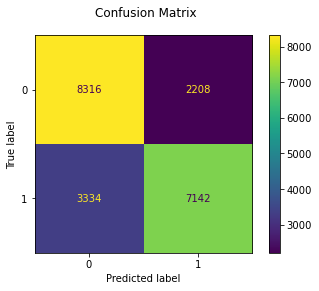

In [23]:
# Now predict the value of the digit on the second part :

print("Classification report for classifier %s:\n%s\n" % (rf, metrics.classification_report(y_test, y_pred)))

disp = metrics.plot_confusion_matrix(rf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

## Question (Application example) :  
Based on Arthur's infos below, w'ill try to predict if Arthur risks to have heart deasses or not (Arthur is just an imaginary person that we created to test our model)

- 53 ans
- fumeur 
- sportif
- 175 cm
- 85 kg
- taux de cholestérol au dessus de la normal 
- un taux de glucose normal
- une tension artérielle systolique dans la moyenne 
- une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données



### Creation of the data-vector based on arthur file description : 
- AGE: 53
- HEIGHT: 175
- WEIGHT: 85
- GENDER: 2
- CHOLESTEROL: 2
- GLUCOSE: 1
- SMOKE: 1
- PHYSICAL_ACTIVITY: 1
- AP_HIGH: 128.82 => dans la moyenne (mean) :(calculated below)
- AP_LOW: 82.94 => correspond à la moyenne du 3e quartile (50%-75%) du jeu de données : (calculated below)
- ALCOHOL: 0 : not alcoholic, 1 : alcoholic => we miss this information, so w'ill test both cases


In [24]:
# AP_HIGH: dans la moyenne (mean)
AP_HIGH = df['ap_hi'].mean()
print('AP_HIGH =', round(AP_HIGH,2))

# AP_LOW: correspond à la moyenne du 3e quartile (50%-75%) du jeu de données
mask = (df.ap_lo>=df.ap_lo.quantile(0.5)) & (df.ap_lo<=df.ap_lo.quantile(0.75))
AP_LOW  = df.ap_lo.loc[mask].mean()
print('AP_LOW =', round(AP_LOW,2))

AP_HIGH = 128.82
AP_LOW = 82.94


In [25]:
#We must show the columns list to respect the order when we create the Arthur_data vector
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [26]:
Arthur_data_alc0 = [[53, 2, 175, 85, 128, 82, 2, 1, 1, 0, 1]]
Arthur_data_alc1 = [[53, 2, 175, 85, 128, 82, 2, 1, 1, 1, 1]]

In [27]:
# if Arthur is not alcoholic 
card_pred = rf.predict(Arthur_data_alc0)
card_pred 

array([0])

In [28]:
# if Arthur is alcoholic 
card_pred = rf.predict(Arthur_data_alc1)
card_pred 

array([0])

### As response to our question, we can say that Arthur don't risk to have heart deasises either he is alcoholic or not.